In [1]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.18.0.post0

In [2]:
from scipy.spatial import distance

# Distance Metrics Animation

In [3]:
x = 1
y = 3

In [4]:
distance.minkowski([x, y], [0, 0]) - 1

2.1622776601683795

In [14]:
%%manim -qm PointMoving


class PointMoving(Scene):
    def construct(self):

        # Coordinate system
        axes = Axes(
            axis_config={
                
                "font_size": 20, 
                "tick_size": 0.08,
                "tip_shape": StealthTip, 
                "tip_height": 0.12,
                },          
            ).add_coordinates()


        # Dot and dot path
        dot = Dot() 
        path_line = Line([0, 0, 0], [2, 1, 0])
        # path_circle = Circle(radius=1, color=BLUE)
        
        
        # Text

        label = Text("A wild dot appears!")

        
        # Contours

        def calculate_contour(x, y, level):
            x_dot, y_dot, z_dot = dot.get_center()
            return distance.minkowski([x, y], [x_dot, y_dot], 5) - level

        contour_1 = ImplicitFunction(lambda x, y: calculate_contour(x, y, 1))
        contour_2 = ImplicitFunction(lambda x, y: calculate_contour(x, y, 2))


        # Animation

        self.add(axes)
        self.wait()
        # self.play(Create(label))
        self.play(Create(dot))
        # self.add(contour_1, contour_2)
        # self.remove(contour_1, contour_2)
             
        self.play(MoveAlongPath(dot, path_line), run_time=2, rate_func=linear)
        self.add(contour_1, contour_2)
        # self.play(Create(contour_1, contour_2))
        # # self.play(Rotating(dot, about_point=[0, 0, 0]), run_time=3)
        # self.wait()



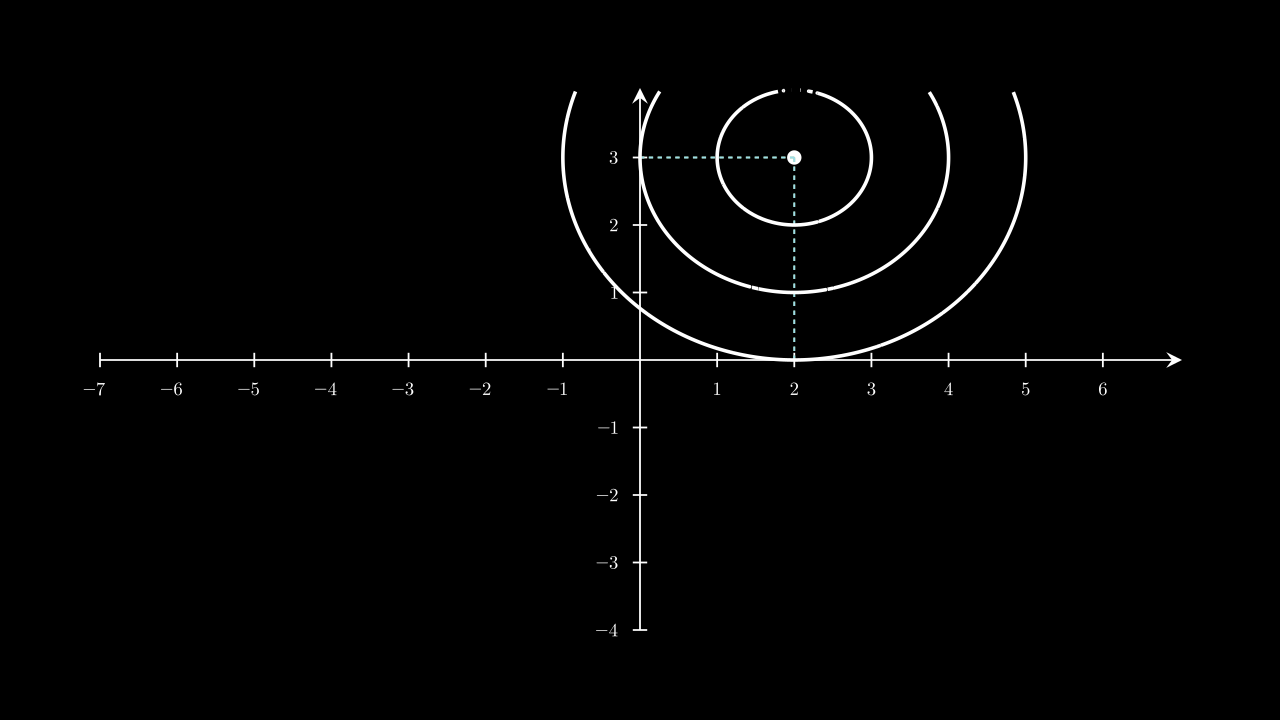

In [38]:
%%manim -qm PointMoving2


class PointMoving2(Scene):


    def construct(self):
        
        def distance_function(x, y, dot_center, level = 1):
            x_p, y_p = dot_center
            return distance.minkowski([x, y], [x_p, y_p]) - level

        # Coordinate system
        axes = Axes(
            axis_config={
                
                "font_size": 20, 
                "tick_size": 0.08,
                "tip_shape": StealthTip, 
                "tip_height": 0.12,
                },          
            ).add_coordinates()
        
        self.add(axes)


        # Dot 
        dot = Dot(axes.c2p(2, 3)) 
        self.add(dot)

        # Dot Coordinates

        line_1 = axes.get_lines_to_point(dot.get_center(), color=GREEN_B)
        line_2 = axes.get_lines_to_point(dot.get_center(), color=BLUE_B)
        self.add(line_1, line_2)

        # Contours
        for level in range(1, 4):
            contour = axes.plot_implicit_curve(lambda x, y: distance_function(x, y, axes.p2c(dot.get_center()), level = level))
            self.add(contour)



